# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Domingo Domingo 8 de septiembre a las 23:59hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [24]:
import requests

# En "buscar" ponemos lo que queremos buscar en MercadoLibre y en "url" la url de la API de MercadoLibre

buscar = "autos ford usados"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))

# Hacemos el pedido o request y obtenemos la response
response = requests.request("GET", url)
print(response) # correcto

# Vemos el texto
response.text

# Guardamos el resultado en un diccionario (json)
data = response.json()
#type(data) # dict
data





<Response [200]>


{'site_id': 'MLA',
 'country_default_time_zone': 'GMT-03:00',
 'query': 'autos ford usados',
 'paging': {'total': 10933, 'primary_results': 1000, 'offset': 0, 'limit': 50},
 'results': [{'id': 'MLA1448727725',
   'title': 'Ford Ranger Dc 4x2 Xlt Mt 3.2 2021 Usado Entrega Inmediata',
   'condition': 'used',
   'thumbnail_id': '823066-MLA78837721256_092024',
   'catalog_product_id': 'MLA28033491',
   'listing_type_id': 'gold_premium',
   'sanitized_title': 'ford-ranger-dc-4x2-xlt-mt-32-2021-usado-entrega-inmediata',
   'permalink': 'https://auto.mercadolibre.com.ar/MLA-1448727725-ford-ranger-dc-4x2-xlt-mt-32-2021-usado-entrega-inmediata-_JM',
   'buying_mode': 'classified',
   'site_id': 'MLA',
   'category_id': 'MLA1744',
   'domain_id': 'MLA-CARS_AND_VANS',
   'thumbnail': 'http://http2.mlstatic.com/D_823066-MLA78837721256_092024-I.jpg',
   'currency_id': 'ARS',
   'order_backend': 1,
   'price': 25900000,
   'original_price': None,
   'sale_price': {'price_id': '',
    'amount': 25900

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [22]:
import pandas as pd

# Supongamos que esta es la tasa de conversión actual (1 USD "blue" = 1240 ARS)
tasa_dolar = 1240

# Armamos una Lista donde guardamos los precios en USD
precios = []

# Recorremos los ítems en la respuesta
for item in data['results']:
    precio = item['price']
    moneda = item['currency_id']
    
    # Si la moneda es ARS, convertimos el precio a USD y lo redondeamos
    if moneda == 'ARS':
        precio_en_usd = round(precio / tasa_dolar)
    else:
        # Si ya está en USD, lo redondeamos también
        precio_en_usd = round(precio)
    
    precios.append(precio_en_usd)

# Creamos un DataFrame con los precios en USD
df_precios = pd.DataFrame(precios, columns=['Precio en USD'])

# Calculamos el precio promedio, el mínimo y el máximo en USD y redondearmos
precio_promedio = round(df_precios['Precio en USD'].mean())
precio_minimo = round(df_precios['Precio en USD'].min())
precio_maximo = round(df_precios['Precio en USD'].max())

# Imprimimos los resultados
print(f"Precio promedio en USD: {precio_promedio}")
print(f"Precio mínimo en USD: {precio_minimo}")
print(f"Precio máximo en USD: {precio_maximo}")

# Mostramos los primeros 10 precios
df_precios.head(10)


Precio promedio en USD: 20346
Precio mínimo en USD: 5355
Precio máximo en USD: 76000


,Precio en USD
0,20887
1,27097
2,27097
3,10500
4,38629
5,17298
6,76000
7,15726
8,11600
9,12800


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


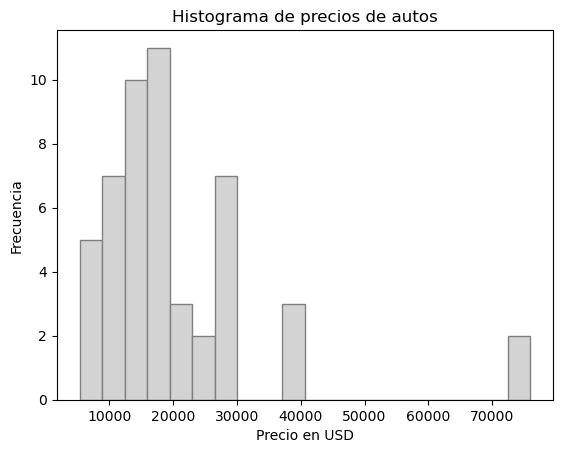

In [23]:
import matplotlib.pyplot as plt

# Vemos los estilos disponibles para los gráficos
print(plt.style.available)

# Elegimos un estilo para el gráfico
plt.style.use('seaborn-v0_8-pastel')

# Creamos el histograma con los precios en USD
plt.hist(df_precios['Precio en USD'], bins=20, color='lightgrey', edgecolor='grey')

# Añadimos título y etiquetas
plt.title('Histograma de precios de autos')
plt.xlabel('Precio en USD')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()

# Hay dos outlier: un auto que cuesta 76000 USD que es un Ford Mustang y otro que cuesta 39000 USD que es una Ford Maverick

#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

In [25]:
# Armamos una Lista donde guardamos los modelos de los autos
modelos = []

# Recorremos los ítems en la respuesta
for item in data['results']:

    # Extraemos el modelo del auto
    modelo = item.get('attributes', [{}])
    for atributo in modelo:
        if atributo.get('id') == 'MODEL':
            modelos.append(atributo.get('value_name', 'No disponible'))
            break
    else:
        modelos.append('No disponible')

# Agregamos la lista de modelos como una nueva columna al DataFrame existente
df_precios['Modelo'] = modelos

# Mostramos las primeras filas del DataFrame actualizado
df_precios.head(10)





,Precio en USD,Modelo
0,20887,Ranger
1,27097,Ranger
2,27097,Ranger
3,10500,Ecosport
4,38629,Bronco Sport
5,17298,Focus III
6,76000,F-150
7,15726,Focus III
8,11600,Ecosport
9,12800,Focus III


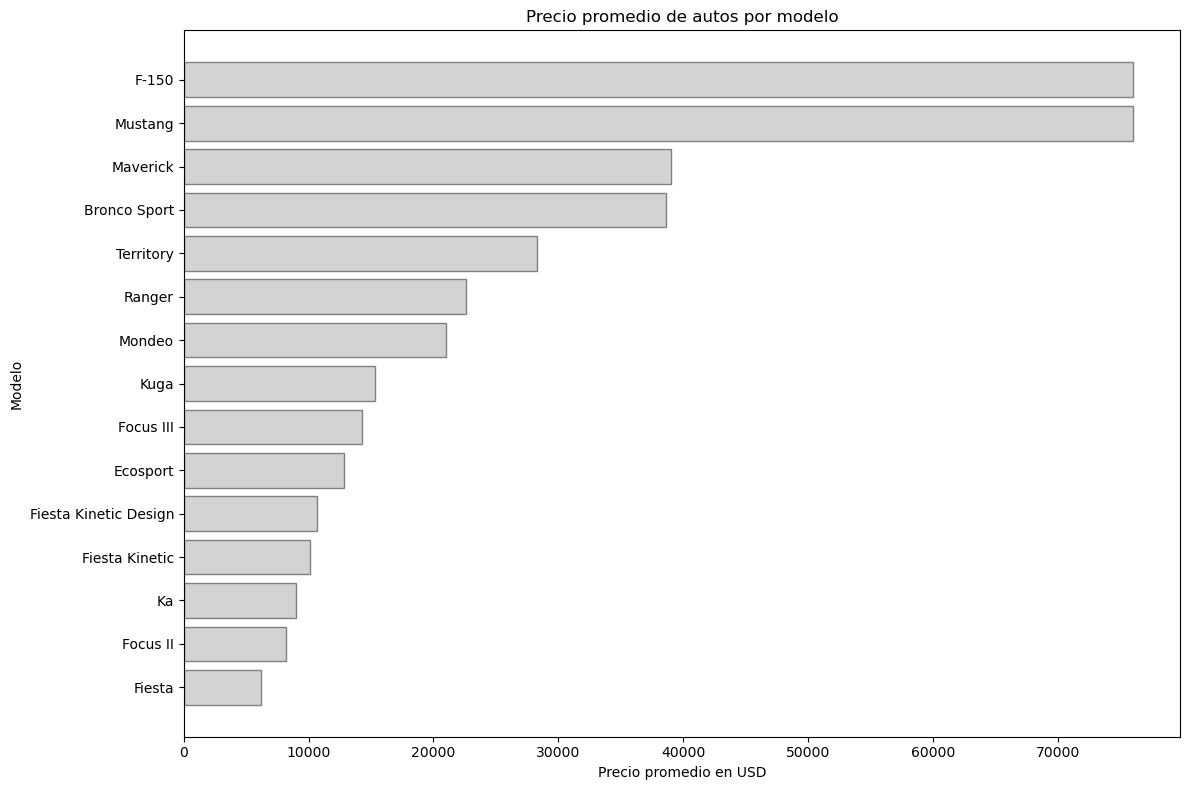

In [26]:
import matplotlib.pyplot as plt

# Calculamos el precio promedio por modelo y ordenamos de menor a mayor
precio_promedio_por_modelo = df_precios.groupby('Modelo')['Precio en USD'].mean().sort_values()

# Configuramos del gráfico
plt.style.use('seaborn-v0_8-pastel')

# Creamos el gráfico de barras horizontales
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico
plt.barh(precio_promedio_por_modelo.index, precio_promedio_por_modelo.values, color='lightgrey', edgecolor='grey')

# Añadimos título y etiquetas
plt.title('Precio promedio de autos por modelo')
plt.xlabel('Precio promedio en USD')
plt.ylabel('Modelo')

# Ajustamos el layout para evitar el corte de etiquetas
plt.tight_layout()

# Mostramos el gráfico
plt.show()



### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Asignamos la URL de la portada de La Nación a la variable "url"
url = "https://www.lanacion.com.ar/"

# Realizamos la solicitud a la página
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Creamos una lista para almacenar los enlaces
links = []

# Buscamos todos los elementos "<a" que contengan el atributo href
for a in soup.find_all('a', href=True):
    href = a['href']

    # Filtramos solo los enlaces que contienen "nid" (al final, para detectar las noticias)
    if 'nid' in href:

        # Concatenamos el dominio si el enlace es relativo
        if href.startswith('/'):
            href = url + href.lstrip('/')

                # Nos aseguramos de que el enlace empiece con el dominio de La Nación (habia aparecido una publicidad de DiTella al fianl)
        if href.startswith(url):
            links.append(href)


# Creamos un DataFrame con los enlaces
df_links = pd.DataFrame(links, columns=['URL'])

# Exportamos el DataFrame a un archivo Excel
df_links.to_excel('links_noticias.xlsx', index=False)

print("Enlaces guardados en 'links_noticias.xlsx'")



Enlaces guardados en 'links_noticias.xlsx'


In [29]:
# Los primeros 3 enlaces que aparecen, no son noticias, sino que son como urls de secciones.
# Busque para ver si tambien tenian el "nid" y no lo tenian. No se por que me los esta añadiendo a la lista de links.

# Defino el número máximo de enlaces a mostrar
max_links = 10
count = 0

# Buscamos todos los elementos <a que contengan el atributo href
for a_tag in soup.find_all('a', href=True):
    href = a_tag['href']

    # Filtramos solo los enlaces que contienen "nid"
    if 'nid' in href:
        print(a_tag.prettify())
        count += 1
        if count >= max_links:
            break  # Salir del bucle cuando se alcance el número máximo de enlaces


# Aca se en los primeros 3 enlaces, que no tienen el nid y no entiendo por que los esta agregando.

<a class="link ln-link dd-link" href="https://www.lanacion.com.ar/estados-unidos/" target="_self" title="Estados Unidos">
 Estados Unidos
</a>

<a class="link ln-link dd-link" href="https://www.lanacion.com.ar/comunidad/" target="_self" title="Comunidad">
 Comunidad
</a>

<a class="link ln-link dd-link" href="https://www.lanacion.com.ar/comunidad/hablemos-de-todo/" target="_self" title="Hablemos de todo">
 Hablemos de todo
</a>

<a class="link ln-link flex flex-column --unstyled" href="/el-mundo/asi-fue-la-salida-de-edmundo-gonzalez-de-venezuela-amenazado-por-la-dictadura-de-nicolas-maduro-nid08092024/" target="_self" title="Exilio forzado. Así fue la salida de Edmundo González de Venezuela, amenazado por la dictadura de Nicolás Maduro">
 <section class="media-container" href="/el-mundo/asi-fue-la-salida-de-edmundo-gonzalez-de-venezuela-amenazado-por-la-dictadura-de-nicolas-maduro-nid08092024/" title="Así fue la salida de Edmundo González de Venezuela, amenazado por la dictadura de Nic